# Another multiple linear regression
# with train, test split
## and a very small dataset
#### from https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [12]:
df.shape

(20, 3)

In [ ]:
#20 rows and 3 columns

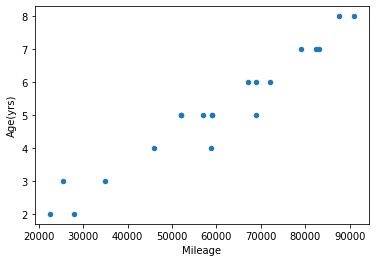

In [6]:
df.plot(kind = 'scatter', x='Mileage', y='Age(yrs)')
plt.show()

# Define your variables


In [7]:
# Y is dependent variable of how much the sell price is
# X are independent variables of Mileage and Age
X = df[['Mileage','Age(yrs)']]
Y = df['Sell Price($)']
X.head(10)

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


# Train Test Split

In [8]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [9]:
x_train

,Mileage,Age(yrs)
15,25400,3
8,91000,8
4,46000,4
19,52000,5
10,83000,7
17,69000,5
5,59000,5
14,82450,7
18,87600,8
11,79000,7


In [10]:
len(x_train)

16

In [13]:
#So training set has 16 out of the 20 rows
len(x_test)

4

In [14]:
# and test set has 4 of the 20 rows

# Regression

In [15]:
clf = LinearRegression()

In [16]:
clf.fit(x_train,y_train)

LinearRegression()

In [17]:
clf.predict(x_test)

array([25681.48156383, 22455.96769977, 34750.46108656, 37648.73097629])

In [18]:
clf.score(x_test,y_test)

0.9559731553816877

In [ ]:
#This model is 96% accurate

In [19]:
import statsmodels.api as sm

In [20]:
X=sm.add_constant(X)        #to add constant value in the model
model= sm.OLS(Y,X).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sell Price($)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     124.0
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           7.29e-11
Time:                        12:10:49   Log-Likelihood:                -179.73
No. Observations:                  20   AIC:                             365.5
Df Residuals:                      17   BIC:                             368.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+04   1480.191     31.904      0.000    4.41e+04    5.03e+04
Mileage       -0.3383      0.094     -3.616      0.002      -0.536      -0.141
Age(yrs)    -352.7920   1079.282     -0.327      0.748   -2629.878    1924.294
==============================================================================
Omnibus:                        0.060   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.284
Skew:                           0.032   Prob(JB):                        0.868
Kurtosis:                       2.420   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# In our case, only Mileage is significant
# Y = Selling Price, x = Mileage and Years
# Selling price goes down by $33 with every increased mile

#since we have multivariate regression, we need to look at adjusted r-squred, which is pretty good at 92%